In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow.keras import models
from tensorflow.keras import layers

import matplotlib.pyplot as plt

import random
import numpy as np

#Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 

from sklearn.preprocessing import normalize #machine learning algorithm library


from IPython.display import display, Image
from pandas import get_dummies
from sklearn.model_selection import train_test_split
# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
NUM_FEATURES = 2
NUM_ITER = 2000
learning_rate = 0.1

W: [0.5706535  0.53257656]
b: -0.12361646
plot_y: [ 4.7109623 -4.236027 ]


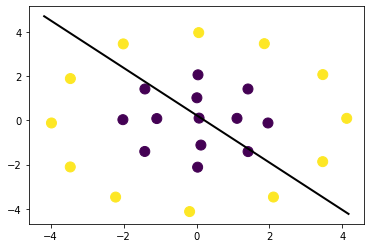

In [3]:
x = np.array([[-3.98,-0.12],
[-3.464,-2.11],
[-3.461,1.89],
[-2.22,-3.474],
[-2.02,0.03],
[-2.01,3.459],
[-1.42,-1.409],
[-1.416,1.419],
[-1.09,0.08],
[-0.19,-4.13],
[0.01,1.02],
[0.03,-2.12],
[0.04,2.06],
[0.06,3.97],
[0.07,0.1],
[0.12,-1.12],
[1.11,0.09],
[1.411,1.419],
[1.414,-1.415],
[1.86,3.47],
[1.96,-0.12],
[2.11,-3.472],
[3.461,-1.87],
[3.464,2.07],
[4.12,0.09]], np.float32) # 4x2, input
y = np.array([1,
1,
1,
1,
0,
1,
0,
0,
0,
1,
0,
0,
0,
1,
0,
0,
0,
0,
0,
1,
0,
1,
1,
1,
1], np.float32) # 4, correct output, AND operation
#y = np.array([0, 1, 1, 1], np.float32) # OR operation
y = np.reshape(y, [25,1]) # convert to 4x1
 
X = tf.compat.v1.placeholder(tf.float32, shape=[25, 2])
Y = tf.compat.v1.placeholder(tf.float32, shape=[25, 1])
 
W = tf.Variable(tf.zeros([NUM_FEATURES, 1]), tf.float32)
B = tf.Variable(tf.zeros([1, 1]), tf.float32)
 
yHat = tf.sigmoid( tf.add(tf.matmul(X, W), B) ) # 4x1
err = Y - yHat
deltaW = tf.matmul(tf.transpose(X), err ) # have to be 2x1
deltaB = tf.reduce_sum(err, 0) # 4, have to 1x1. sum all the biases? yes
W_ = W + learning_rate * deltaW
B_ = B + learning_rate * deltaB
 
step = tf.group(W.assign(W_), B.assign(B_)) #to update the values of weights and biases.
 
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
 
for k in range(NUM_ITER):
 #print(deltaW.eval())
 sess.run([step], feed_dict={X: x, Y: y})
 #print("\n")
 #print(k)
 #print (sess.run(W))
 
W = np.squeeze(sess.run(W))
b = np.squeeze(sess.run(B))
 
# Now plot the fitted line. We need only two points to plot the line
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = - 1 / W[1] * (W[0] * plot_x + b)
plot_y = np.reshape(plot_y, [2, -1])
plot_y = np.squeeze(plot_y)
 
print('W: ' + str(W))
print('b: ' + str(b))
print('plot_y: '+ str(plot_y))
 
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
#plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

## diagram

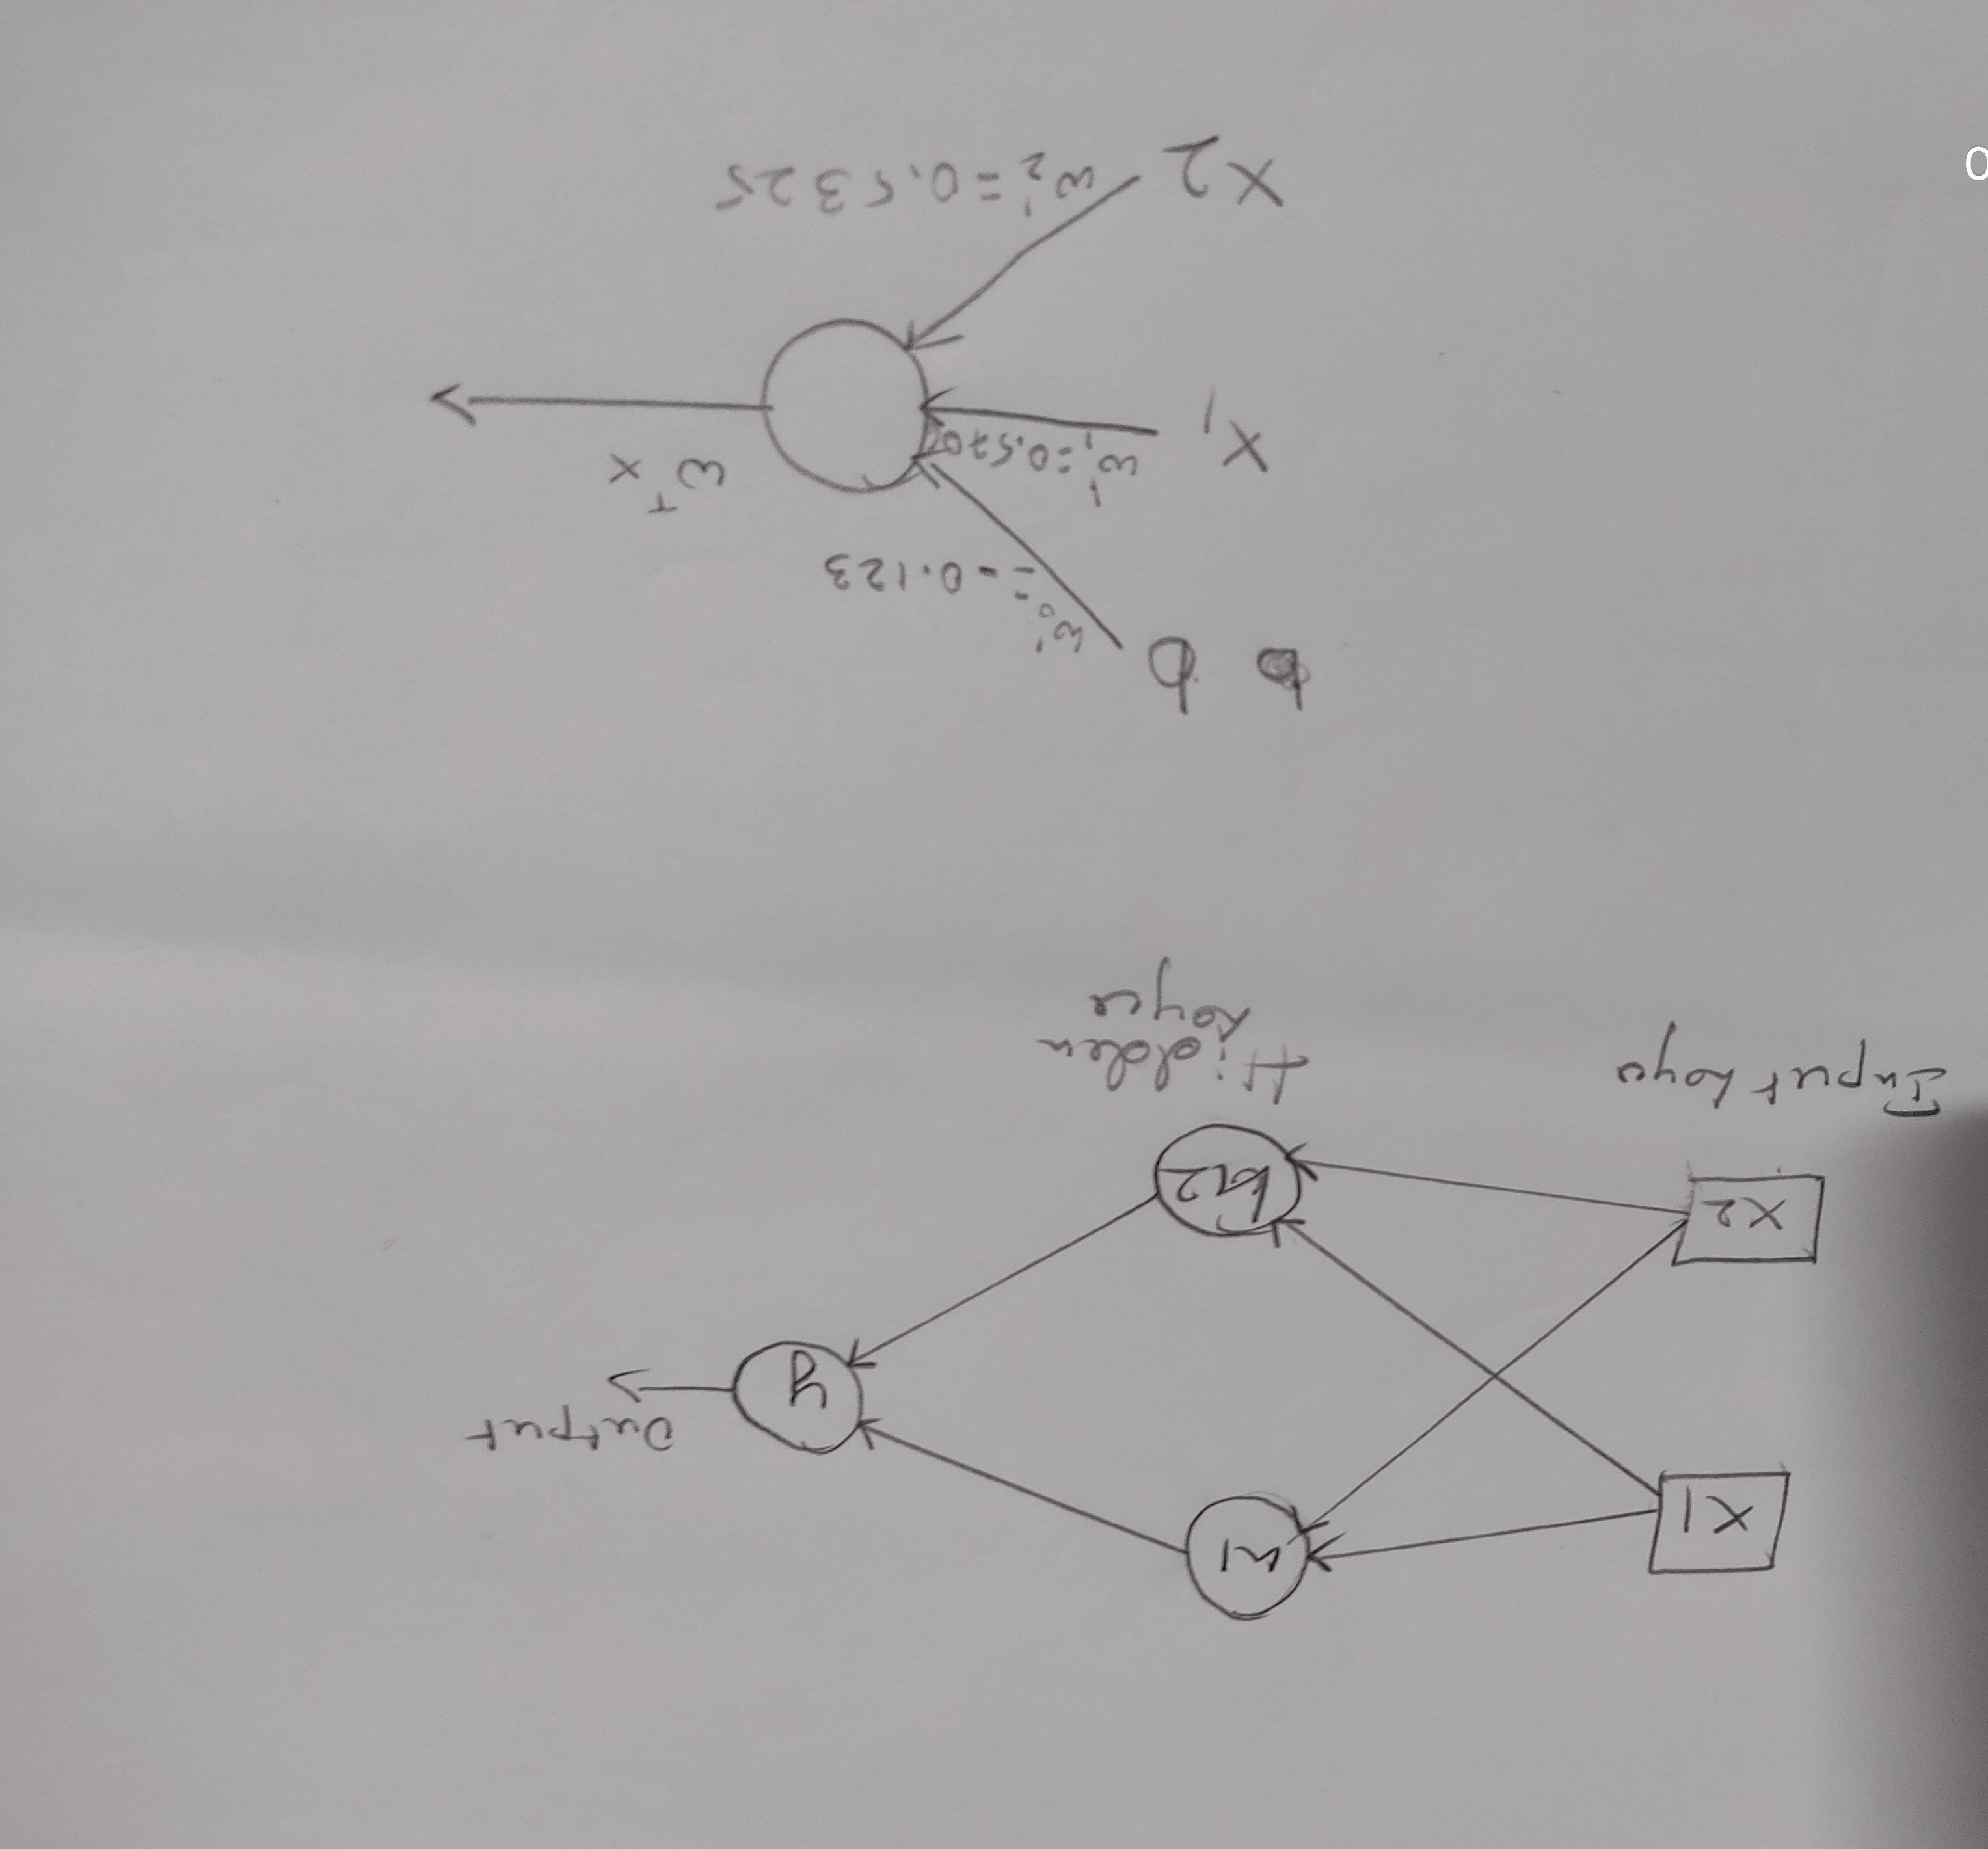

In [10]:

import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import hard_sigmoid


if __name__ == "__main__":
    # Load the Pima diabetes dataset from CSV
    # and convert into a NumPy matrix suitable for
    # extraction into X, y format needed for TensorFlow
    #diabetes = pd.read_csv('diabetes.csv').values

    # Extract the feature columns and outcome response
    # into appropriate variables
    X = x
    y = y

    # Create the 'Perceptron' using the Keras API
    model = Sequential()
    model.add(Dense(1, input_shape=(2,), activation=hard_sigmoid, kernel_initializer='glorot_uniform'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the perceptron using stochastic gradient descent
    # with a validation split of 20%
    model.fit(X, y, epochs=225, batch_size=25, verbose=1, validation_split=0.2)

    # Evaluate the model accuracy
    _, accuracy = model.evaluate(X, y)
    print("%0.3f" % accuracy)

Train on 20 samples, validate on 5 samples
Epoch 1/225
20/20 [==============================] - 0s 3ms/sample - loss: 0.6397 - acc: 0.6000 - val_loss: 9.6486 - val_acc: 0.2000
Epoch 2/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6393 - acc: 0.6000 - val_loss: 9.6485 - val_acc: 0.2000
Epoch 3/225
20/20 [==============================] - 0s 200us/sample - loss: 0.6389 - acc: 0.6000 - val_loss: 9.6485 - val_acc: 0.2000
Epoch 4/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6385 - acc: 0.6000 - val_loss: 9.6485 - val_acc: 0.2000
Epoch 5/225
20/20 [==============================] - 0s 176us/sample - loss: 0.6381 - acc: 0.6000 - val_loss: 9.6485 - val_acc: 0.2000
Epoch 6/225
20/20 [==============================] - 0s 201us/sample - loss: 0.6377 - acc: 0.6000 - val_loss: 9.6484 - val_acc: 0.2000
Epoch 7/225
20/20 [==============================] - 0s 181us/sample - loss: 0.6373 - acc: 0.6000 - val_loss: 8.2889 - val_acc: 0.2000
Epoch 8/225
20

C:\Users\pjatthi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 32/225
20/20 [==============================] - 0s 201us/sample - loss: 0.6286 - acc: 0.6000 - val_loss: 7.3374 - val_acc: 0.2000
Epoch 33/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6283 - acc: 0.6000 - val_loss: 7.3307 - val_acc: 0.2000
Epoch 34/225
20/20 [==============================] - 0s 251us/sample - loss: 0.6280 - acc: 0.6000 - val_loss: 7.3243 - val_acc: 0.2000
Epoch 35/225
20/20 [==============================] - 0s 201us/sample - loss: 0.6277 - acc: 0.6000 - val_loss: 7.3181 - val_acc: 0.2000
Epoch 36/225
20/20 [==============================] - 0s 201us/sample - loss: 0.6274 - acc: 0.6000 - val_loss: 7.3122 - val_acc: 0.2000
Epoch 37/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6271 - acc: 0.6000 - val_loss: 7.3065 - val_acc: 0.2000
Epoch 38/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6268 - acc: 0.6000 - val_loss: 7.3010 - val_acc: 0.2000
Epoch 39/225
20/20 [============================

20/20 [==============================] - 0s 150us/sample - loss: 0.6140 - acc: 0.6000 - val_loss: 7.1586 - val_acc: 0.2000
Epoch 93/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6138 - acc: 0.6000 - val_loss: 7.1587 - val_acc: 0.2000
Epoch 94/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6136 - acc: 0.6000 - val_loss: 7.1588 - val_acc: 0.2000
Epoch 95/225
20/20 [==============================] - 0s 201us/sample - loss: 0.6135 - acc: 0.6000 - val_loss: 7.1590 - val_acc: 0.2000
Epoch 96/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6133 - acc: 0.6000 - val_loss: 7.1593 - val_acc: 0.2000
Epoch 97/225
20/20 [==============================] - 0s 200us/sample - loss: 0.6131 - acc: 0.6000 - val_loss: 7.1596 - val_acc: 0.2000
Epoch 98/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6130 - acc: 0.6000 - val_loss: 7.1600 - val_acc: 0.2000
Epoch 99/225
20/20 [==============================] - 0s 150u

Epoch 152/225
20/20 [==============================] - 0s 100us/sample - loss: 0.6047 - acc: 0.6000 - val_loss: 7.2072 - val_acc: 0.2000
Epoch 153/225
20/20 [==============================] - 0s 201us/sample - loss: 0.6046 - acc: 0.6000 - val_loss: 7.2082 - val_acc: 0.2000
Epoch 154/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6045 - acc: 0.6000 - val_loss: 7.2093 - val_acc: 0.2000
Epoch 155/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6043 - acc: 0.6000 - val_loss: 7.2104 - val_acc: 0.2000
Epoch 156/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6042 - acc: 0.6000 - val_loss: 7.2115 - val_acc: 0.2000
Epoch 157/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6041 - acc: 0.6000 - val_loss: 7.2127 - val_acc: 0.2000
Epoch 158/225
20/20 [==============================] - 0s 150us/sample - loss: 0.6039 - acc: 0.6000 - val_loss: 7.2138 - val_acc: 0.2000
Epoch 159/225
20/20 [====================

Epoch 212/225
20/20 [==============================] - 0s 200us/sample - loss: 0.5974 - acc: 0.6500 - val_loss: 7.2818 - val_acc: 0.2000
Epoch 213/225
20/20 [==============================] - 0s 125us/sample - loss: 0.5973 - acc: 0.6500 - val_loss: 7.2832 - val_acc: 0.2000
Epoch 214/225
20/20 [==============================] - 0s 150us/sample - loss: 0.5972 - acc: 0.6500 - val_loss: 7.2847 - val_acc: 0.2000
Epoch 215/225
20/20 [==============================] - 0s 100us/sample - loss: 0.5970 - acc: 0.6500 - val_loss: 7.2861 - val_acc: 0.2000
Epoch 216/225
20/20 [==============================] - 0s 251us/sample - loss: 0.5969 - acc: 0.6500 - val_loss: 7.2875 - val_acc: 0.2000
Epoch 217/225
20/20 [==============================] - 0s 151us/sample - loss: 0.5968 - acc: 0.6500 - val_loss: 7.2890 - val_acc: 0.2000
Epoch 218/225
20/20 [==============================] - 0s 100us/sample - loss: 0.5967 - acc: 0.6500 - val_loss: 7.2904 - val_acc: 0.2000
Epoch 219/225
20/20 [====================